## Observations and Insights 

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, 
    #variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method is the most straightforward, 
    #creating multiple series and putting them all together at the end.

In [174]:
# # Create a summary table
# means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# summary_table1 = pd.DataFrame({"Average Tumor Volume (mm3)": means,
#                                "Median Tumor Volume (mm3)": medians,
#                                "Std. Dev. Tumor Volume (mm3)": std,
#                                "Sem Tumor Volume (mm3)": sem,
#                                "Variance Tumor Volume (mm3)": variance})
# summary_table1

## Bar Plots

In [175]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [176]:
# # Create a drug list to iterate over:
# drug_list = summary_table1.index.tolist()
# for x in range(len(drug_list)):
#     drug_name = drug_list[x]
#     drug_list[x] = clean_df.loc[clean_df["Drug Regimen"] == drug_list[x]]
#     plot_title = f"{drug_name} - Mice Count vs. Timepoint"
#     drug_list[x] = drug_list[x][["Mouse ID", "Timepoint"]]
#     drug_list[x] = drug_list[x].groupby('Timepoint')
#     mouse_id = drug_list[x]['Mouse ID'].count()
#     timepoint_barchart = mouse_id.plot(kind='bar', title=plot_title, color='g')
#     timepoint_barchart.set_xlabel("Timepoints")
#     timepoint_barchart.set_ylabel("Mice Count")
#     plt.show()

In [177]:
# # Same plots using plt.bar
# x_axis = [value for value in range(0, 50, 5)]
# # Start with 'Capomulin'
# drug_list_plt = summary_table1.index.tolist()
# drug_name_plt = ""
# for x in range(len(drug_list_plt)):
#     drug_name_plt = drug_list_plt[x]
#     print(drug_name_plt)
    
# drug_list_plt = summary_table1.index.tolist()
# drug_name_plt = ""
# for x in range(len(drug_list)):
#     drug_name_plt = drug_list_plt[x]
#     #print(drug_name_plt)
#     plt.bar(x_axis, mouse_id, color='g', alpha=0.5, width=3, align="center")
    
#     #plt.xticks(value for value in range(0, 50, 5))
#     plt.title(f"{drug_name_plt} - Mouse ID Count per Timepoint")
#     plt.xlabel("Timepoints")
#     plt.ylabel("Mouse ID Count")
#     plt.savefig(f"{drug_name_plt}_MouseID_Count_per_Timepoint")
#     plt.show()

In [178]:
# # Option 3 - aggregate the plots into one:
# # Create a grouped_df with two columns:
# grouped_gf = clean_df.groupby(['Timepoint','Drug Regimen'])
# mice_count = grouped_gf['Timepoint'].count()

# # Aggreate the data into one plot:
# agg_df = clean_df.groupby(['Drug Regimen','Timepoint']).agg({'Mouse ID':'count'})

# # This dictionary is to color the bars in the custom plot based on specific drug.
# values = ["royalblue","darkorange","green","red","lime","blueviolet","pink","cornflowerblue","peru","lightseagreen"]
# keys = drug_list_plt
# color_drug_dict = dict(zip(keys, values))
# print(color_drug_dict)

# #colors_drug_dict = pd.dict({})
# agg_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', color=values, width=0.65) 
# plt.title("Figure 1 - Aggregated results for Mouse ID Counts for each Drug Regimen at each Timepoint")
# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.xlabel("Timepoints")
# plt.ylabel("Mouse ID Count")
# plt.tight_layout()
# plt.show()
# plt.savefig("agg_df_plot")

#### Change from Markdown to Code to try plotting custom plots
#### Practicing getting a custom plot based on the user input of the Drug Regimen:
drug_user_input = input("What Drug Regimen would you like to look up?")

#### Change from Markdown to Code to try plotting custom plots
#### Note: the color-code will be based on the aggregated plot above.
for x in range(len(drug_list_plt)):
    if drug_user_input == drug_list_plt[x]:
        x_axis = [value for value in range(0, 50, 5)]
        mouse_id = drug_list[x]['Mouse ID'].count()
        color = color_drug_dict.get(drug_list_plt[x], "")
        print()
        plt.bar(x_axis, mouse_id, color=color, width=3, alpha=.75, align="center")
        plt.title(f"{drug_user_input} - Mouse ID Count per Timepoint")
        plt.xlabel("Timepoints")
        plt.ylabel("Mouse ID Count")
        plt.show()
        break
print(x_axis)

In [179]:
# # How to identify the 4 most promising drug regimens from the plot above.
# # Attempt 2 - Use sum() function on each of the drug regimen's timepoints
# agg_tp_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'sum'})
# print(agg_tp_df)

# # plot with unstack option:
# agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.title("Figure 2 - Aggregated results for Sum of Timepoints for each Drug Regimen at each Timepoint")
# plt.xlabel("Timepoints")
# plt.ylabel("Timepoints Sum - Accumulative")
# plt.tight_layout()
# plt.show()
# plt.savefig("agg_tp_df.png")
# print(f"Based on the graph below, the top 4 treatments are: ")

# # Attempt 3 - Use max() function on each of the drug regimen's timepoints
# agg_tp_max_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'max'})

# # plot with unstack option:
# agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.title("Figure 3 - Aggregated results for Maximum Timepoints for each Drug Regimen at each Timepoint")
# plt.xlabel("Timepoints")
# plt.ylabel("Timepoints Max - Accumulative")
# plt.tight_layout()
# plt.show()
# plt.savefig("agg_tp_df.png")
# #print(f"Based on the graph below, the top 4 treatments are: ")

# # Try extracting top 4 Timepoints based on their maximum value:
# mean_tumor_volume = clean_df.groupby(['Drug Regimen', 'Timepoint']).mean()
# mean_tumor_volume.head()
# # mean_df.to_csv("new_df.csv")

In [180]:
# mean_tumor_volume = mean_tumor_volume['Tumor Volume (mm3)'].reset_index()
# mean_tumor_volume.head()

In [181]:
# std_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).std().reset_index()
# std_tumor_volume.head()

In [182]:
# sem_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).sem().reset_index()
# sem_tumor_volume.head()

## Pie Plots

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [184]:
# gender_df = clean_df.groupby("Sex")
# gender_df.count()
# gender_mice_filtered = gender_df["Sex"]
# gender_mice_filtered.count()

In [185]:
# # Generate Pie Plot using plt.pie()
# labels = ["Female Mice", "Male Mice"]
# sizes = [gender_mice_filtered.count()]
# colors = ['cyan', 'yellow']
# plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90, colors=colors)
# plt.title("Mice Sex Distribution using plt.pie method")
# plt.savefig("Female and Male Mice Distribution")
# plt.show()

In [186]:
# # doc_plot = df.plot.pie(y='mass', figsize=(5, 5))
# sizes

In [187]:
# # Sex distribution using plot.pie()
# doc_df = pd.DataFrame({'Counts': [922, 958]},
#                   index=['Female', 'Male'])
# doc_df

In [188]:
# plot_sex = doc_df.plot.pie(y='Counts', title="Mice Sex Distribution using plot.pie() method", labels=['Female','Male'], figsize=(4,4), startangle=90, autopct="%.2f%%", colors=['c','y'])

## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#### Based on the analysis above (particularly Figure 1 - Aggregated Results), the four most promising treatments are:
['Capomulin', 'Ramicane', 'Ketapril', 'Zoniferol']
#### However, this is only visually. Continue the analysis on All Drug Regimens through statistical analysis.

In [189]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [190]:
# Start from re-importing the modules and cleaning up the data
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

In [191]:
# Prepare a new df to work on the statistics part:
tumor_volume_df = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Grouped by the 'Drug Regimen' and "Timepoint"
grouped_tumor_volume_df = tumor_volume_df.groupby(['Drug Regimen', 'Timepoint'])
# Reset index and sort values in descending order:
sorted_noindex_mean_grouped_tumor_volume_df = grouped_tumor_volume_df.mean().reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
# Try to use loc function to extract the data only for Capomulin drug regimen.
drug1_Capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# Select only Tumor Volume and Timpoint columns
drug1_Capomulin_filtered = drug1_Capomulin[['Timepoint', 'Tumor Volume (mm3)']]
# Group by Timepoint
drug1_Capomulin_filtered_grouped = drug1_Capomulin_filtered.groupby('Timepoint')
# Mean of group by object and rename the column of the filtered
drug1_Capomulin_filtered_grouped.mean()
drug1_Capomulin_filtered.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) Capomulin'})


,Timepoint,Tumor Volume (mm3) Capomulin
0,0,45.000000
226,0,45.000000
227,0,45.000000
228,0,45.000000
229,0,45.000000
...,...,...
1854,45,40.728578
1859,45,38.125164
1878,45,47.685963
1888,45,41.581521


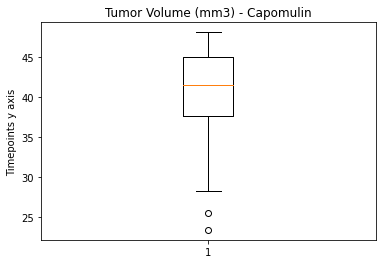

In [192]:
# From Instructions - README:
# Calculate the final tumor volume of each mouse 
    # across four of the most promising treatment regimens: 
        #Capomulin, Ramicane, Infubinol, and Ceftamin. 
        
# Calculate the quartiles and IQR and quantitatively determine 
    # if there are any potential outliers across all four treatment regimens.

# Create a single plot for Capomulin drug:    
tumor_volume = drug1_Capomulin_filtered['Tumor Volume (mm3)']
tumor_volume

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) - Capomulin')
ax1.set_ylabel('Timepoints y axis')
ax1.boxplot(tumor_volume)
plt.show()

From the box and whiskers plots below, there are few outliers detected:
 - "Capomulin", "Propriva", "Ramicane", "Stelasyn"


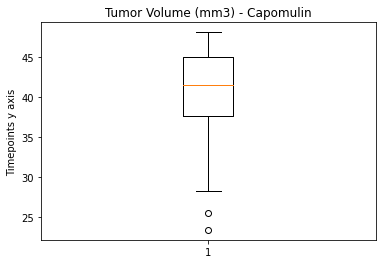

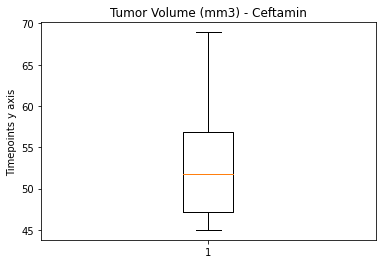

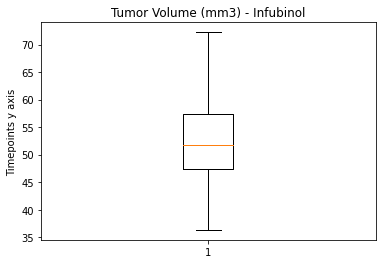

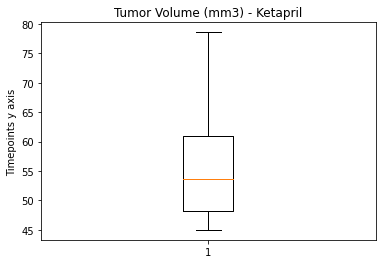

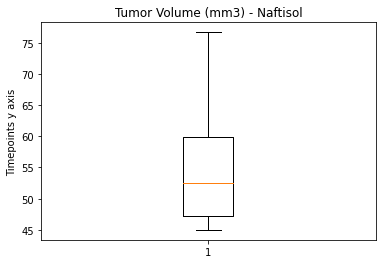

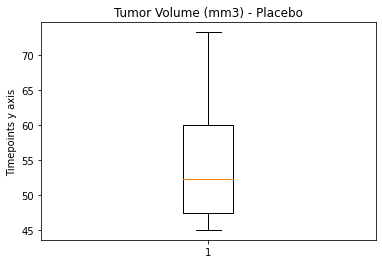

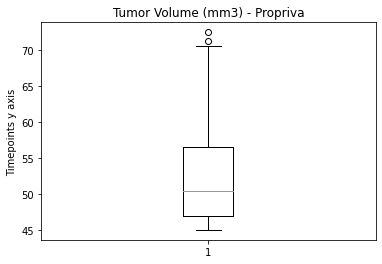

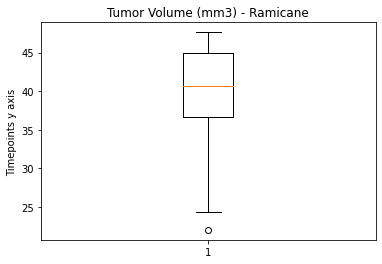

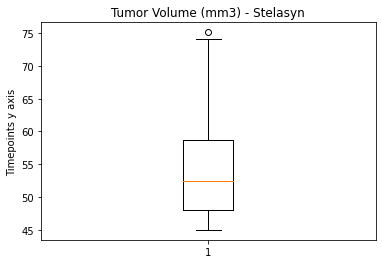

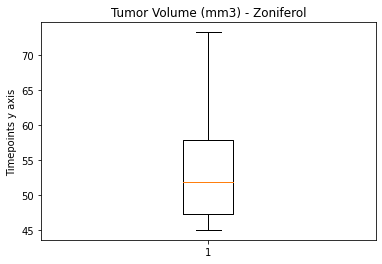

In [212]:
# Create a for loop to iterate over drug list and generate box and whiskers plot for each of the drug regimens. Also .loc clean_df to only use data with Timepoint=45 (at the end of the treatment)
print(f"From the box and whiskers plots below, there are few outliers detected:")
print(f' - "Capomulin", "Propriva", "Ramicane", "Stelasyn"')

drug_list = summary_table1.index.tolist()
#print(drug_list)
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    #print(drug_name)
    drug_name_df = clean_df.loc[clean_df["Drug Regimen"] == drug_name]
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    #print(plot_title)
    filtered_drug_name_df = drug_name_df[['Timepoint', 'Tumor Volume (mm3)']]
#filetered_drug_name_df    
    grouped_filt_drug_name_df = filetered_drug_name_df.groupby('Timepoint')
#grouped_filt_drug_name_df
    mean_grouped_filt_drug_df = grouped_filt_drug_name_df.mean()
#mean_grouped_filt_drug_df    
    renamed_mean_grouped_df = mean_grouped_filt_drug_df.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}")})
#renamed_mean_grouped_df
    # option 2
    tumor_volume = drug_name_df['Tumor Volume (mm3)']
# tumor_volume

    # Create df based one the clean_df using .loc method to extract only the Timepoint == 45, as final tumor volume
    final_tumor_vol_df = drug_name_df.loc[clean_df['Timepoint'] == 45]
    grouped_final_tumor_vol_df = final_tumor_vol_df.groupby('Mouse ID')
#grouped_final_tumor_vol_df    
    mean_grouped_final_drug = grouped_final_tumor_vol_df.mean()
    renamed_mean_grouped_final_df = mean_grouped_final_drug.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}"),
                                                                            'Timepoint': (f"Timepoint, {drug_name}"),
                                                                            'Metastatic Sites': (f"Metastatic Sites, {drug_name}"),
                                                                            'Age_months': (f"Age_months, {drug_name}"),
                                                                            'Weight (g)': (f"Weight (g), {drug_name}")})

#renamed_mean_grouped_final_df
    

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Tumor Volume (mm3) - {drug_name}')
    ax1.set_ylabel('Timepoints y axis')
    ax1.boxplot(tumor_volume)
    plt.show()

In [266]:
# Back to README instructions - Calculate the final tumor volume of each mouse 
    # across four of the most promising treatment regimens: 
        # Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR 
    # and quantitatively determine if there are any potential outliers across all four treatment regimens.

final_volume_df = clean_df.loc[clean_df['Timepoint'] == 45]
final_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [269]:
grouped_final_volume_df = final_volume_df.groupby('Drug Regimen').mean()
grouped_final_volume_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667
Ketapril,45.0,70.662958,3.363636,16.272727,27.727273
Naftisol,45.0,69.265506,2.538462,12.230769,27.153846
Placebo,45.0,68.084082,3.272727,11.818182,27.727273
Propriva,45.0,66.258529,2.571429,12.142857,27.142857
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000
Stelasyn,45.0,68.438310,1.727273,12.727273,27.545455


In [275]:
sorted_grouped_final_vol_test7_df = final_volume_df.groupby(['Drug Regimen', 'Tumor Volume (mm3)'])
sorted_grouped_final_vol_test7_df

In [278]:
lambda_test7_df = sorted_grouped_final_vol_test7_df.apply(lambda x: x.sort_values('Tumor Volume (mm3)'))
lambda_test7_df

Mouse ID  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Tumor Volume (mm3)                                                
Capomulin    23.343598          1849     s185         45           23.343598   
             28.430964          1843     m601         45           28.430964   
             28.484033          1846     x401         45           28.484033   
             31.023923          1889     u364         45           31.023923   
             31.896238          1797     y793         45           31.896238   
...                                       ...        ...                 ...   
Zoniferol    68.163195          1832     g296         45           68.163195   
             68.401286          1834     w575         45           68.401286   
             68.611061          1813     q511         45           68.611061   
             70.827796          1837     q633         45           70.827796   
             73.324432          1840     f545         45           73.324432   

                                      Metastatic Sites Drug Regimen     Sex  \
Drug Regimen Tumor Volume (mm3)                                               
Capomulin    23.343598          1849                 1    Capomulin  Female   
             28.430964          1843                 1    Capomulin    Male   
             28.484033          1846                 0    Capomulin  Female   
             31.023923          1889                 3    Capomulin    Male   
             31.896238          1797                 2    Capomulin    Male   
...                                                ...          ...     ...   
Zoniferol    68.163195          1832                 4    Zoniferol  Female   
             68.401286          1834                 3    Zoniferol  Female   
             68.611061          1813                 3    Zoniferol  Female   
             70.827796          1837                 2    Zoniferol    Male   
             73.324432          1840                 1    Zoniferol  Female   

                                      Age_months  Weight (g)  
Drug Regimen Tumor Volume (mm3)                               
Capomulin    23.343598          1849           3          17  
             28.430964          1843          22          17  
             28.484033          1846          16          15  
             31.023923          1889          18          17  
             31.896238          1797          17          17  
...                                          ...         ...  
Zoniferol    68.163195          1832          14          29  
             68.401286          1834          16          28  
             68.611061          1813           2          28  
             70.827796          1837          12          25  
             73.324432          1840          20          26  

[130 rows x 8 columns]

In [312]:
# Find Top 4 most promising Drug Regimens for treating cancer in mice
sorted_grouped_final_vol_test7a_df = final_volume_df.groupby(['Drug Regimen'])
sorted_grouped_final_vol_test7a_df

In [313]:
mean_sorted_grouped_final_vol_test7a_df = sorted_grouped_final_vol_test7a_df.mean()
mean_sorted_grouped_final_vol_test7a_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667
Ketapril,45.0,70.662958,3.363636,16.272727,27.727273
Naftisol,45.0,69.265506,2.538462,12.230769,27.153846
Placebo,45.0,68.084082,3.272727,11.818182,27.727273
Propriva,45.0,66.258529,2.571429,12.142857,27.142857
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000
Stelasyn,45.0,68.438310,1.727273,12.727273,27.545455


In [315]:
test7b_df = mean_sorted_grouped_final_vol_test7a_df.sort_values(by='Tumor Volume (mm3)', ascending=True, ignore_index=False)
test7b_df.head(4)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667


In [230]:
# Group df to get values in Tumor Volume sorted
grouped_final_volume_df = final_volume_df.groupby('Tumor Volume (mm3)')
grouped_final_volume_df.mean()

,Timepoint,Metastatic Sites,Age_months,Weight (g)
Tumor Volume (mm3),,,,
22.050126,45,1,21,16
23.343598,45,1,3,17
28.430964,45,1,22,17
28.484033,45,0,16,15
29.128472,45,1,11,16
...,...,...,...,...
75.113288,45,2,2,25
75.123690,45,1,22,28
75.294936,45,4,8,28


In [228]:
mean_grouped_fin_vol_df = grouped_final_volume_df.mean()
mean_grouped_fin_vol_df

,Timepoint,Metastatic Sites,Age_months,Weight (g)
Tumor Volume (mm3),,,,
22.050126,45,1,21,16
23.343598,45,1,3,17
28.430964,45,1,22,17
28.484033,45,0,16,15
29.128472,45,1,11,16
...,...,...,...,...
75.113288,45,2,2,25
75.123690,45,1,22,28
75.294936,45,4,8,28


In [232]:
test4_df = mean_grouped_fin_vol_df.reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
test4_df

,Tumor Volume (mm3),Timepoint,Metastatic Sites,Age_months,Weight (g)
129,78.567014,45,4,24,30
128,76.668817,45,3,8,26
127,75.294936,45,4,8,28
126,75.123690,45,1,22,28
125,75.113288,45,2,2,25
...,...,...,...,...,...
4,29.128472,45,1,11,16
3,28.484033,45,0,16,15
2,28.430964,45,1,22,17
1,23.343598,45,1,3,17


In [241]:
# Group df to get values in Tumor Volume sorted
grouped_final_volume_drug_regimen_test5_df = final_volume_df.groupby('Drug Regimen')
grouped_final_volume_drug_regimen_test5_df.mean().reset_index()
sorted_test5_df = mean_grouped_fin_vol_df.reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
#sorted_test5_df = sorted_test5_df

agg_fin_vol_df = sorted_test5_df.groupby('Tumor Volume (mm3)').agg({'Drug Regimen':'unique'})


# grouped_final_volume_drug_regimen_df
# test4_df = mean_grouped_fin_vol_df.reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
# test4_df

SpecificationError: nested renamer is not supported

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume average size per timepoint, for each Drug Regimen")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(temp)
plt.show()

In [194]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [195]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [196]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [197]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
